In [27]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from libs import sudukoSolver
from utils import helpers
import os


In [28]:

#width = 960
#height = 720
# Initialisation de la taille des images
heightImg = 450
widthImg = 450


# Chargement du modèle Keras pour la prédiction des chiffres


In [ ]:


current_dir = os.getcwd()
#print(current_dir)
model_path = os.path.join(current_dir, 'model', 'model_trained.keras') 
model = load_model(model_path)


In [30]:
imagePath='images/1.png'
img = cv2.imread(imagePath)
height, width, _ = img.shape
#img = cv2.resize(img, (width, height))
img_result = img.copy()

## Détection et affichage des contours principaux de la grille Sudoku

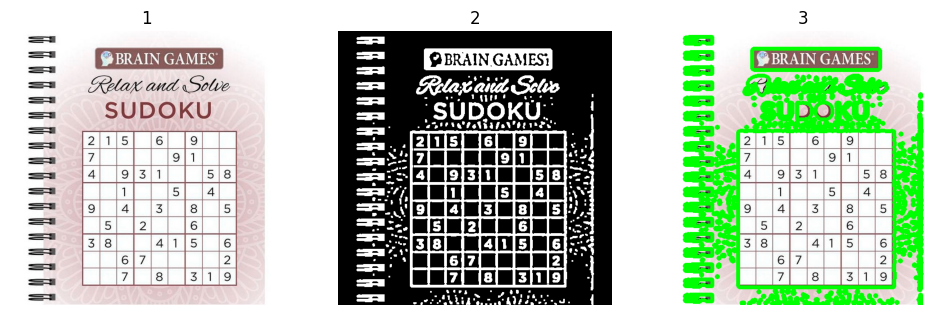

In [31]:
imgThreshold = helpers.preProcess(img)
contours, hierarchy = helpers.getContours(imgThreshold)
imageAllContours=helpers.drawContours(img, contours)
helpers.showMultipleImages([img_result,imgThreshold,imageAllContours],3)

## Extraction et traitement du plus grand contour de la grille Sudoku

In [32]:
contours, hierarchy = helpers.getContours(imgThreshold)
biggest, maxArea, countour = helpers.findBiggestContour(contours)
biggest = helpers.reorderPointsForWarp(biggest)

## Affichage des coordonnées du plus grand contour détecté (biggest)

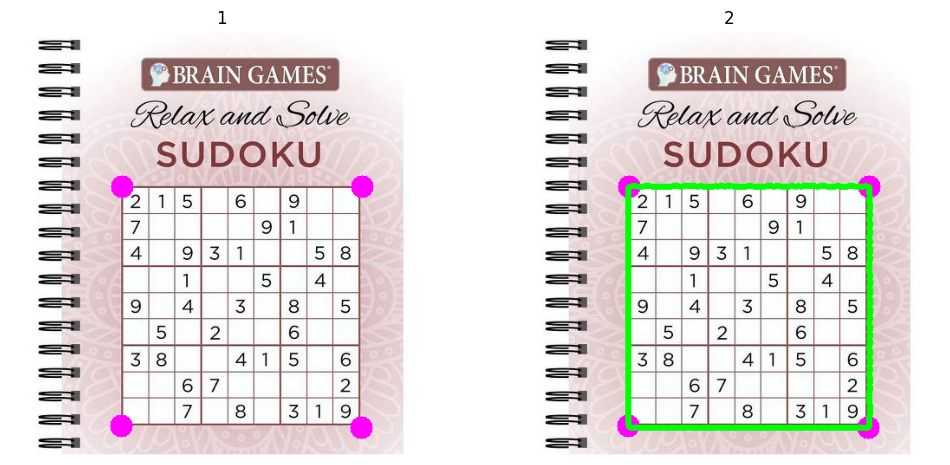

In [33]:
imageWithPoint = helpers.drawContours(img, biggest, (255, 0, 255), 25)
imageWithContourAndPoint = helpers.drawContours(imageWithPoint, [countour])
helpers.showMultipleImages([imageWithPoint,imageWithContourAndPoint],2)

## Transformation de perspective et préparation de la grille Sudoku

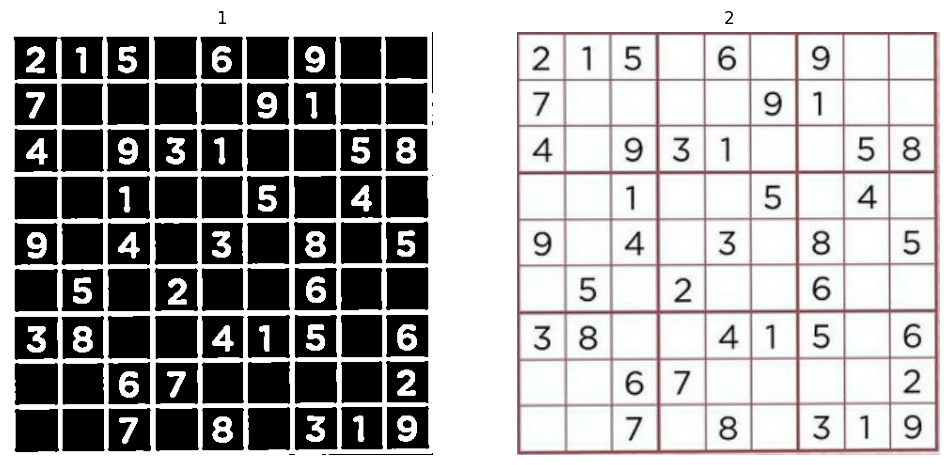

In [34]:
# Transformation de perspective pour obtenir une image de grille de Sudoku
pts1 = np.float32(biggest)
pts2 = np.float32([[0, 0],[widthImg, 0], [0, heightImg],[widthImg, heightImg]])
matrix = cv2.getPerspectiveTransform(pts1, pts2)
imgWarpColored = cv2.warpPerspective(img, matrix, (widthImg, heightImg))

# Prétraitement de l'image de la grille
imgWarpProcessed = helpers.preProcess(imgWarpColored)
helpers.showMultipleImages([imgWarpProcessed,imgWarpColored])

## Extraction des lignes de la grille Sudoku et création des masques

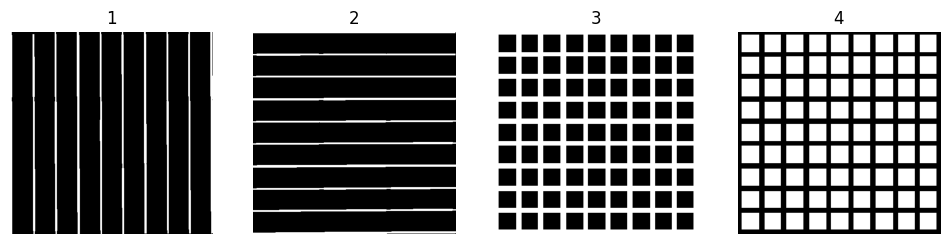

In [35]:
vertical_lines, horizontal_lines = helpers.get_grid_lines(imgWarpProcessed)
maskGrid = helpers.create_grid_mask(vertical_lines, horizontal_lines)
maskGrid2 = helpers.create_grid_mask2(vertical_lines, horizontal_lines)
helpers.showMultipleImages([vertical_lines,horizontal_lines,maskGrid2,maskGrid],4)


## Extraction des chiffres de la grille Sudoku à l'aide du masque

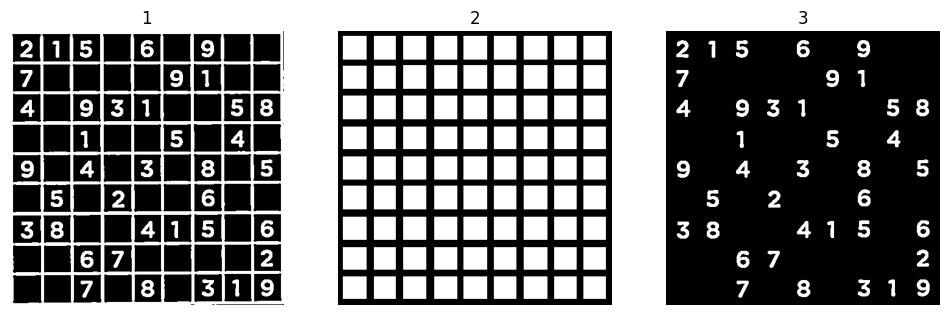

In [36]:
#s'ils sont pareils je le garde
numbersImages = cv2.bitwise_and(imgWarpProcessed, maskGrid)
helpers.showMultipleImages([imgWarpProcessed,maskGrid,numbersImages],3)

## Découpe l'image des chiffres détectés en 81 cases (une pour chaque case de la grille Sudoku)

### Centrer les chiffres au milieu 

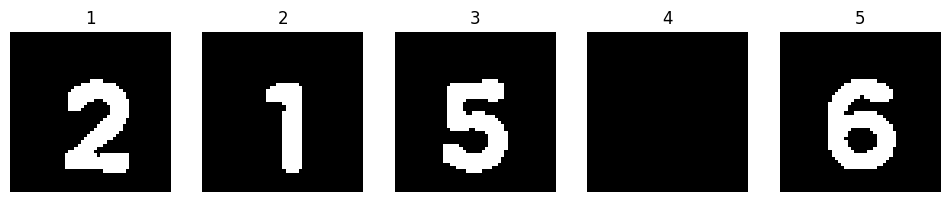

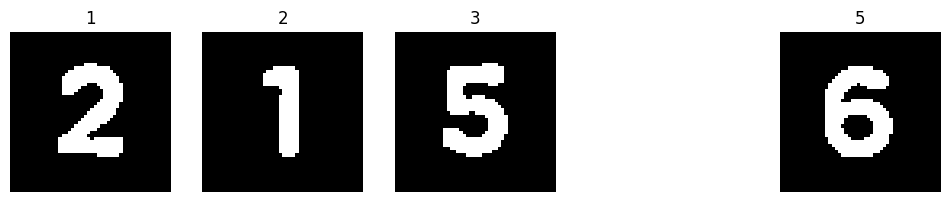

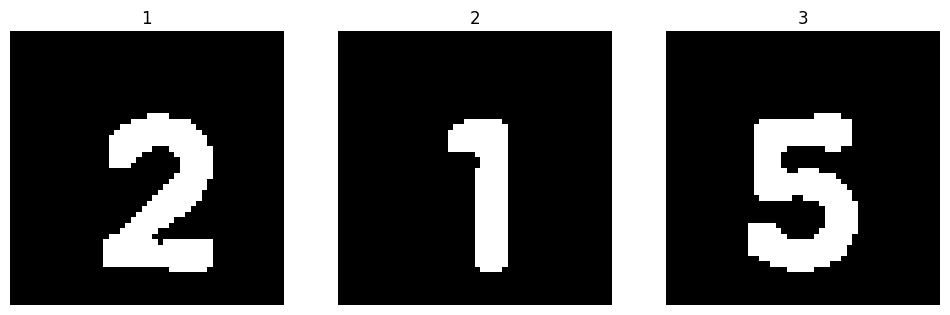

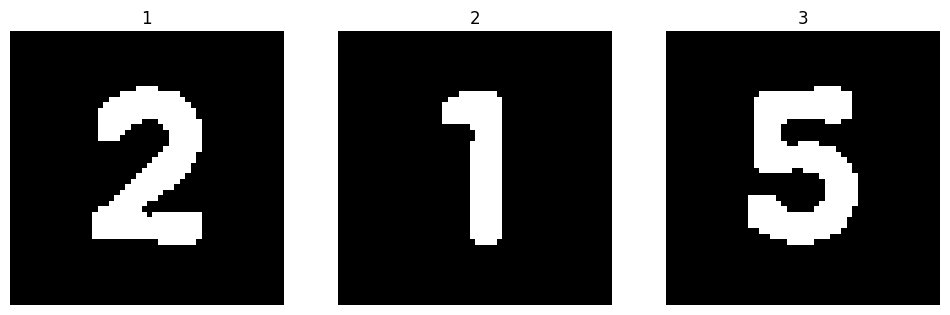

In [37]:
# Découpe l'image des chiffres détectés en 81 cases (une pour chaque case de la grille Sudoku)
squares = helpers.split_into_squares(numbersImages)

# Nettoie chaque case extraite (centrage, suppression du bruit, etc.)
squares_processed = helpers.clean_squares(squares)

# Affiche les 5 premières cases originales extraites
helpers.showMultipleImages(squares[:5],5)

# Affiche les 5 premières cases après nettoyage
helpers.showMultipleImages(squares_processed[:5],5)

# Affiche les 3 premières cases originales extraites
helpers.showMultipleImages(squares[:3],3)

# Affiche les 3 premières cases après nettoyage
helpers.showMultipleImages(squares_processed[:3],3)

## Test de prédiction d'un chiffre depuis une case de la grille 
#### squares[9] === 7 parce que c'est la 10ème case (première case de la 2ème ligne) 

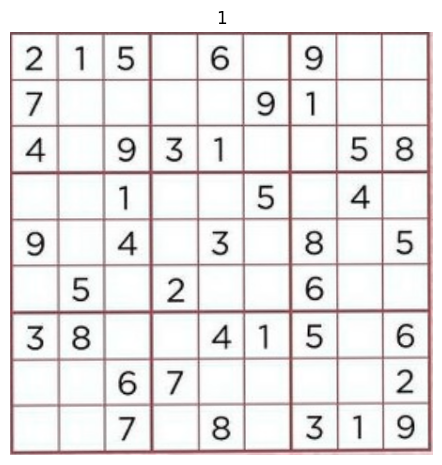

1/1 [==============================] - 0s 47ms/step


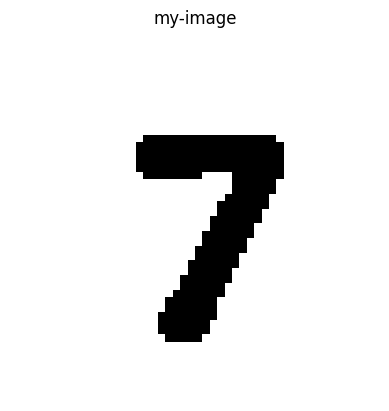

Prédiction : 7, Confiance : 100.00%


7

In [38]:
helpers.showMultipleImages([imgWarpColored])
helpers.getPredectionOneImage(squares[9],model,True)

1/1 [==============================] - 0s 9ms/step


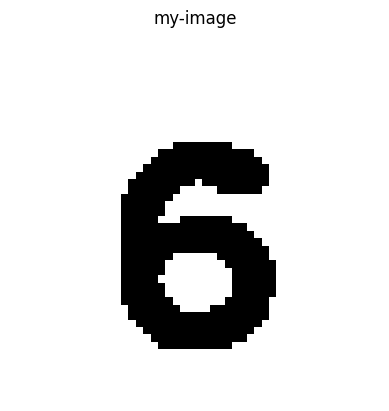

Prédiction : 6, Confiance : 100.00%


6

In [39]:
helpers.getPredectionOneImage(squares[4],model,True)

In [40]:
numbers = helpers.getAllPreditions(squares_processed, model)
numbers = np.asarray(numbers)
posArray = np.where(numbers > 0 , 0 , 1)
board = np.array_split(numbers, 9)

1/1 [==============================] - 0s 9ms/step
Prédiction : 2, Confiance : 100.00%
1/1 [==============================] - 0s 8ms/step
Prédiction : 1, Confiance : 100.00%
1/1 [==============================] - 0s 8ms/step
Prédiction : 5, Confiance : 100.00%
1/1 [==============================] - 0s 8ms/step
Prédiction : 6, Confiance : 100.00%
1/1 [==============================] - 0s 8ms/step
Prédiction : 9, Confiance : 100.00%
1/1 [==============================] - 0s 8ms/step
Prédiction : 7, Confiance : 100.00%
1/1 [==============================] - 0s 8ms/step
Prédiction : 9, Confiance : 100.00%
1/1 [==============================] - 0s 34ms/step
Prédiction : 1, Confiance : 100.00%
1/1 [==============================] - 0s 8ms/step
Prédiction : 4, Confiance : 100.00%
1/1 [==============================] - 0s 8ms/step
Prédiction : 9, Confiance : 100.00%
1/1 [==============================] - 0s 8ms/step
Prédiction : 3, Confiance : 100.00%
1/1 [==============================] - 0s 

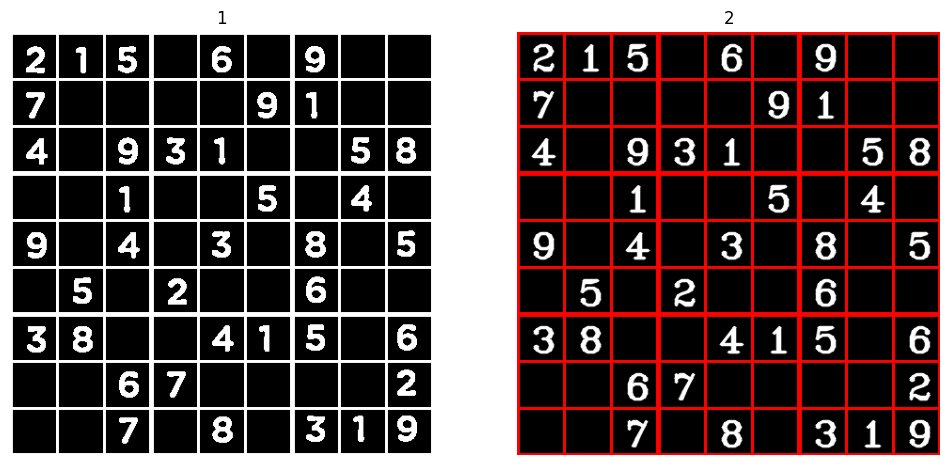

In [41]:
IA_numbers = helpers.drawSudokuDigits(helpers.imageBlank(heightImg,widthImg), numbers, (255,255,255))
helpers.showMultipleImages([helpers.drawGrid(numbersImages),helpers.drawGrid(IA_numbers)],2)
#helpers.showMultipleImages([numbersImages,IA_numbers],2)

In [42]:
sudukoSolver.solve(board)
sudukoSolver.print_board(board)

2 1 5  | 4 6 8  | 9 3 7
7 3 8  | 5 2 9  | 1 6 4
4 6 9  | 3 1 7  | 2 5 8
- - - - - - - - - - - - - 
6 2 1  | 8 9 5  | 7 4 3
9 7 4  | 1 3 6  | 8 2 5
8 5 3  | 2 7 4  | 6 9 1
- - - - - - - - - - - - - 
3 8 2  | 9 4 1  | 5 7 6
1 9 6  | 7 5 3  | 4 8 2
5 4 7  | 6 8 2  | 3 1 9


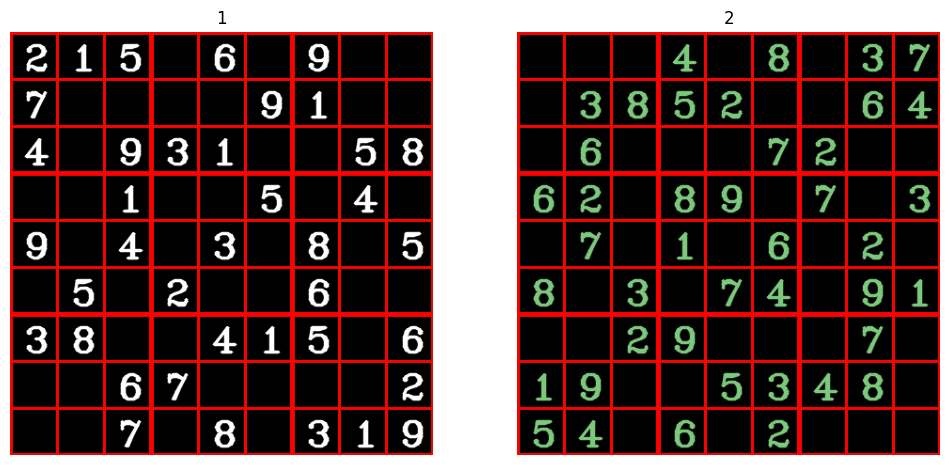

In [43]:
flatList = [item for sublist in board for item in sublist]
solvedNumbers = flatList * posArray
imgSolvedDigits = helpers.drawSudokuDigits(helpers.imageBlank(heightImg,widthImg), solvedNumbers, (124,200,124))
helpers.showMultipleImages([helpers.drawGrid(IA_numbers),helpers.drawGrid(imgSolvedDigits)],2)

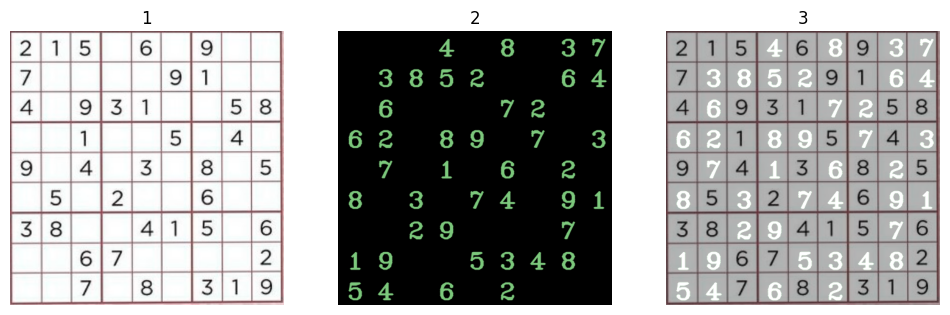

In [44]:
inv_perspective = cv2.addWeighted(imgSolvedDigits, 0.9, imgWarpColored, 0.7, 1)


helpers.showMultipleImages([imgWarpColored,imgSolvedDigits,inv_perspective],3)

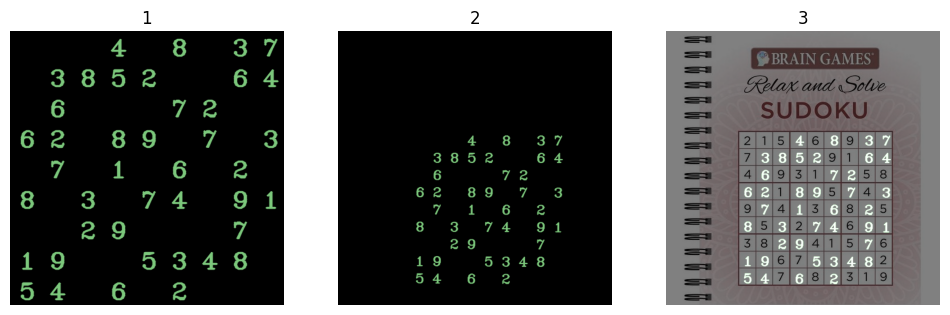

In [45]:
pts2 = np.float32(biggest) # PREPARE POINTS FOR WARP
pts1 =  np.float32([[0, 0],[widthImg, 0], [0, heightImg],[widthImg, heightImg]]) # PRE
matrix = cv2.getPerspectiveTransform(pts1, pts2)  # GER
imgInvWarpColored = img.copy()
imgInvWarpColored = cv2.warpPerspective(imgSolvedDigits, matrix, (width, height))
inv_perspective = cv2.addWeighted(imgInvWarpColored, 1, img, 0.5, 1)
img_result = inv_perspective
#imgWarpColored
helpers.showMultipleImages([imgSolvedDigits,imgInvWarpColored,img_result],3)

## Resultat final

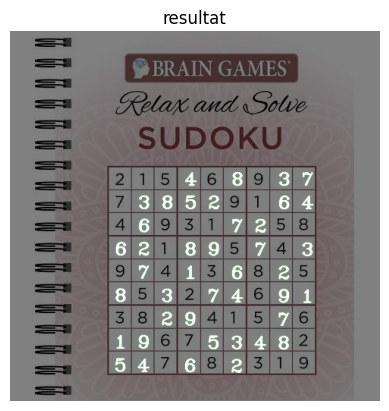

In [46]:
helpers.showImage(img_result, 'resultat')